In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import os
from dotenv import load_dotenv

In [3]:
dbname_var = os.getenv('DATABASE_NAME')
user_var = os.getenv('DATABASE_USER')
password_var = os.getenv('DATABASE_PASSWORD')
host_var = os.getenv('DATABASE_HOST')
port_var = os.getenv('DATABASE_PORT')

In [9]:
conn = psycopg2.connect(dbname=dbname_var, user=user_var,
                        password=password_var,
                        host=host_var,
                        port=port_var)

query_neutral = 'SELECT * FROM neutral_data;'
query_blue_white = 'SELECT * FROM blue_white_data;'
query_green = 'SELECT * FROM green_data;'
query_statistic = 'SELECT * FROM channel_statistic;'

cursor = conn.cursor()
cursor.execute(query_neutral)

df_neutral = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.execute(query_blue_white)

df_blue_white = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.execute(query_green)

df_green = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.execute(query_statistic)

df_statistic = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


conn.close()

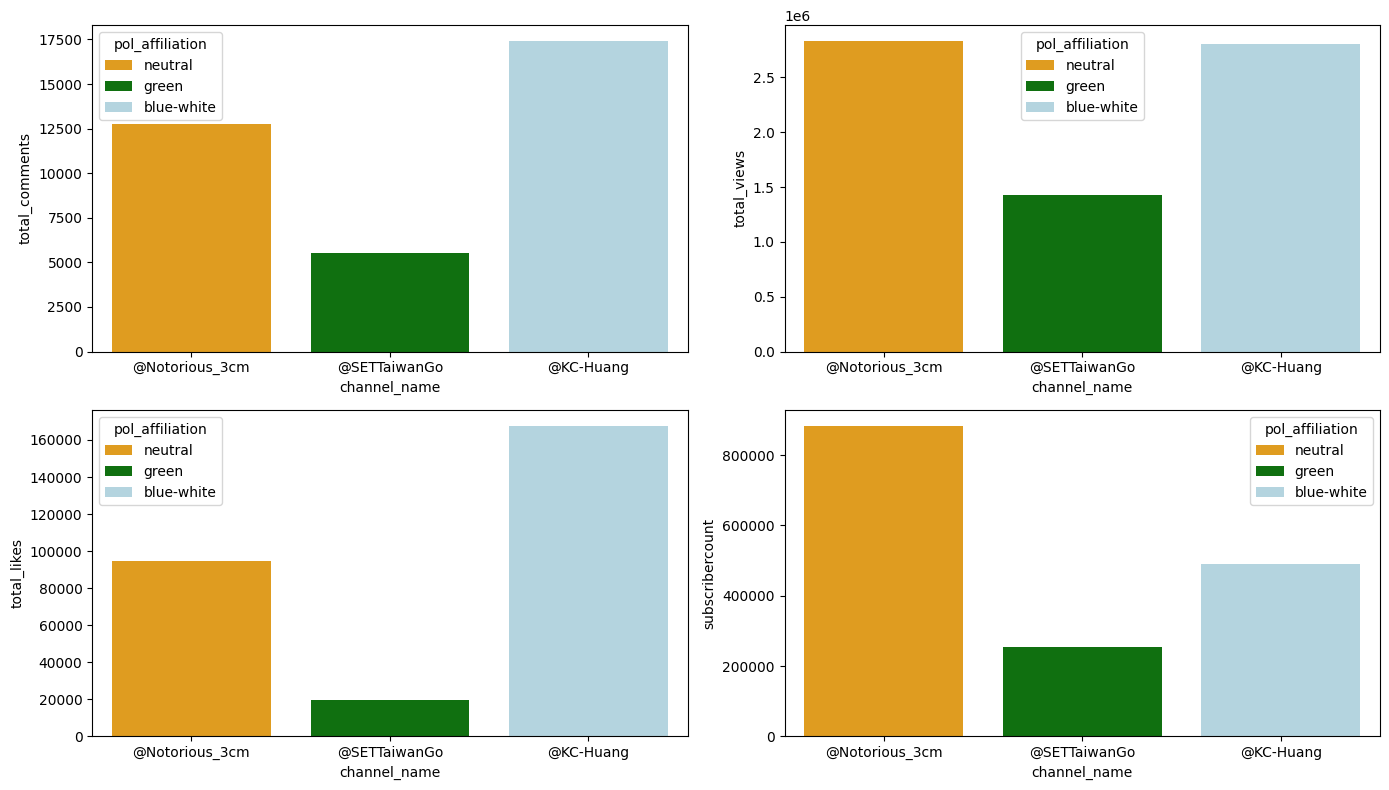

In [50]:


fig,ax = plt.subplots(2,2,figsize=(14,8))
sns.barplot(data = df_statistic,x='channel_name',y='total_comments', hue='pol_affiliation', 
            palette= {'neutral': 'orange','blue-white':'lightblue','green':'green'}, ax=ax[0][0])
sns.barplot(data = df_statistic,x='channel_name',y='total_views', hue='pol_affiliation', 
            palette= {'neutral': 'orange','blue-white':'lightblue','green':'green'}, ax=ax[0][1])
sns.barplot(data = df_statistic,x='channel_name',y='total_likes', hue='pol_affiliation', 
            palette= {'neutral': 'orange','blue-white':'lightblue','green':'green'}, ax=ax[1][0])
sns.barplot(data = df_statistic,x='channel_name',y='subscribercount', hue='pol_affiliation', 
            palette= {'neutral': 'orange','blue-white':'lightblue','green':'green'}, ax=ax[1][1])

plt.tight_layout()
plt.show()

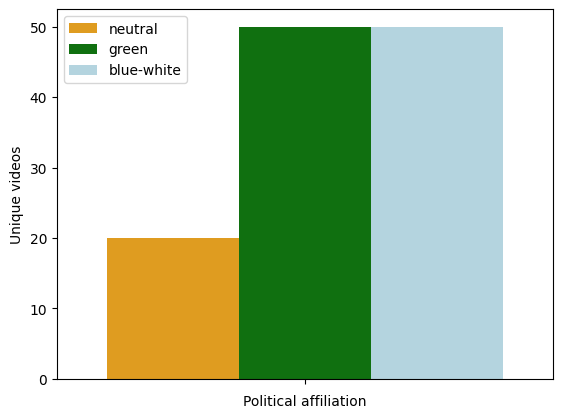

In [59]:
unique_video_counts = [df_neutral['video_id'].nunique(),df_green['video_id'].nunique(),df_blue_white['video_id'].nunique()]

sns.barplot(hue=['neutral','green','blue-white'], y=unique_video_counts, 
            palette= {'neutral': 'orange','blue-white':'lightblue','green':'green'})
plt.xlabel('Political affiliation')
plt.ylabel('Unique videos')
plt.show()